In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('iris.csv')
iris = df.copy()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris.info()
iris.species.value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

In [10]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


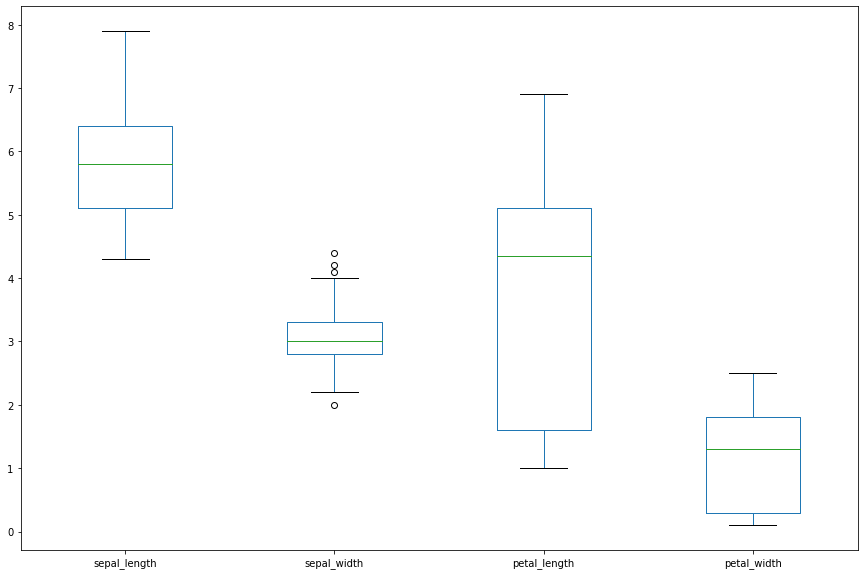

In [11]:
df.plot(kind = 'box', sharex = False, sharey = False, figsize = (15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2A41B148>,
      dtype=object)

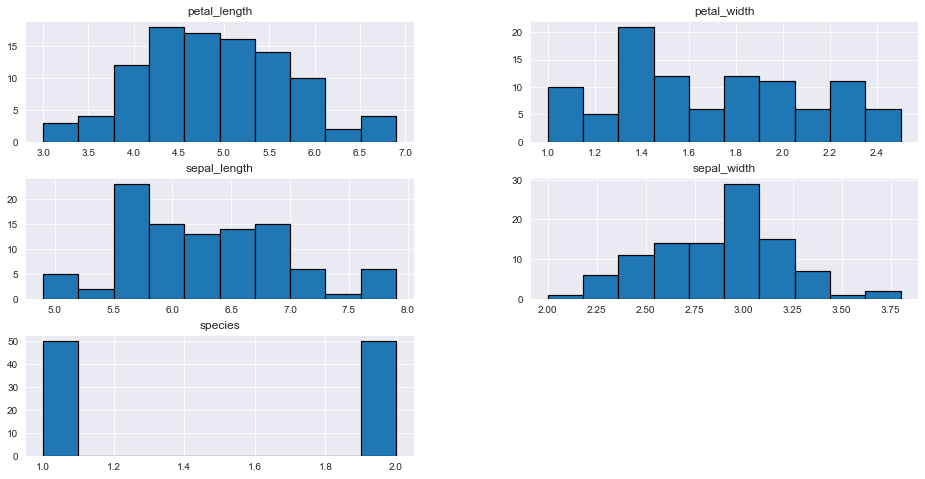

In [52]:
df.hist(edgecolor = 'black', linewidth = 1.2, figsize = (16, 8))

<Figure size 720x576 with 0 Axes>

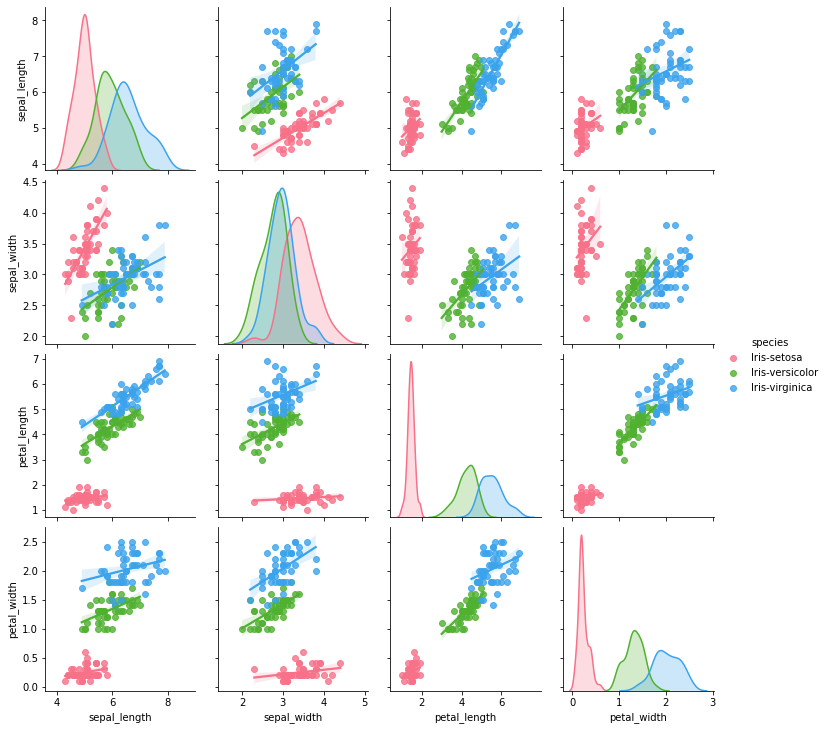

In [13]:
plt.figure(figsize = (10, 8))
sns.pairplot(iris, kind = 'reg', hue = 'species', palette = 'husl')

Text(0.5, 1.0, 'Sepal Length and Sepal Width Distribution of Three Flowers')

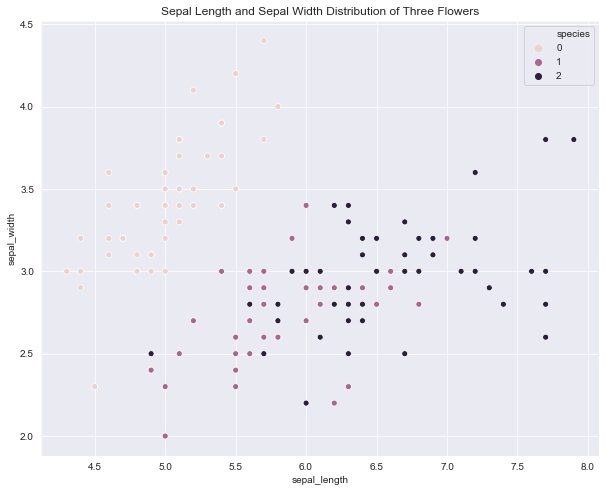

In [54]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = iris.sepal_length, y = iris.sepal_width, hue = iris.species).set_title("Sepal Length and Sepal Width Distribution of Three Flowers")

In [15]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
iris['species'] = label.fit_transform(iris['species'])
iris.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
4,5.0,3.6,1.4,0.2,0
111,6.4,2.7,5.3,1.9,2
63,6.1,2.9,4.7,1.4,1


In [14]:
#importing metrics for eval
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [15]:
y = iris.species
x = iris.drop('species', axis = 1)

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .3, random_state = 0)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
y_pred = knn.predict(x_test)

In [24]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [25]:
#accuracy
from sklearn.metrics import accuracy_score
print("Accuracy is ", accuracy_score(y_pred, y_test))

Accuracy is  0.9777777777777777


In [26]:
#Naive BAyes

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [27]:
y_pred = nb.predict(x_test)

In [28]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy is", accuracy_score(y_pred, y_test))

precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
Accuracy is 1.0


In [29]:
#Support Vector Machine

from sklearn.svm import SVC

In [30]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [31]:
y_pred = svc.predict(x_test)

In [32]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy is", accuracy_score(y_pred, y_test))

precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Accuracy is 0.9777777777777777


In [33]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [35]:
y_pred = rfc.predict(x_test)

In [36]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy is", accuracy_score(y_pred, y_test))

precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Accuracy is 0.9777777777777777


In [39]:
#Logistic Regression

df = iris[50:]
y = df.species
x = df.drop('species', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [41]:
y_pred = lr.predict(x_test)

In [42]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy is", accuracy_score(y_pred, y_test))

precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[14  1]
 [ 0 15]]
Accuracy is 0.9666666666666667


In [43]:
#Creating a Validated Model

from sklearn.model_selection import GridSearchCV
grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

In [44]:
lr_cv = GridSearchCV(lr, grid, cv = 10)
lr_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [45]:
lr_cv.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [46]:
lr_cv_model = LogisticRegression(C = 1.0, penalty = "l2")
lr_cv_model.fit(x_train, y_train)

LogisticRegression()

In [47]:
y_pred = lr_cv_model.predict(x_test)

In [48]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy is", accuracy_score(y_pred, y_test))

precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[14  1]
 [ 0 15]]
Accuracy is 0.9666666666666667
